In [2]:
!pip install mlxtend 

  Using cached mlxtend-0.19.0-py2.py3-none-any.whl (1.3 MB)


In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
!pip install mlxtend

In [4]:
book=pd.read_csv('book.csv')
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [5]:
df=pd.get_dummies(book)
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [68]:
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x:len(x))
frequent_itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(ChildBks, CookBks)",2


In [69]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] <=0.8)]

,support,itemsets,length
7,0.256,"(ChildBks, CookBks)",2


In [52]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules
rules.sort_values('lift',ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
87,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674


<AxesSubplot:>

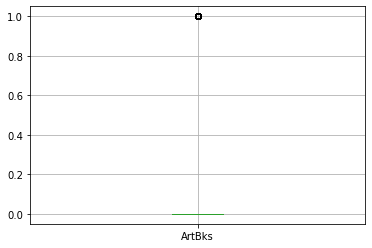

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
book.boxplot(column=['ArtBks'])

<AxesSubplot:>

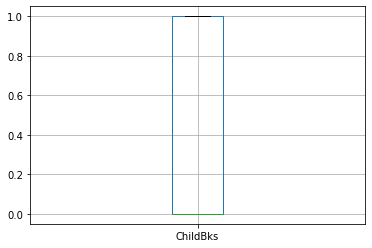

In [70]:
book.boxplot(column=['ChildBks'])

<AxesSubplot:>

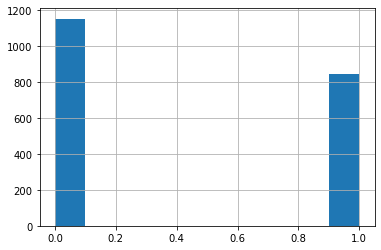

In [71]:
book['ChildBks'].hist()

<AxesSubplot:>

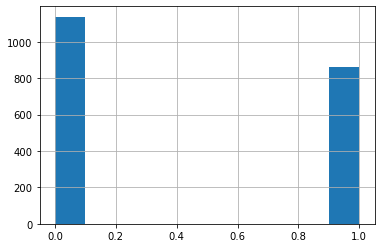

In [29]:
book['CookBks'].hist()

<AxesSubplot:>

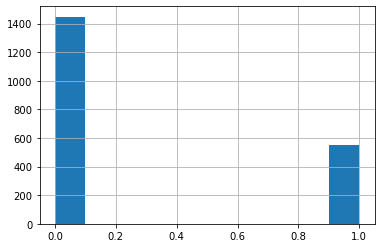

In [36]:
book['GeogBks'].hist()

(array([1571.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         429.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

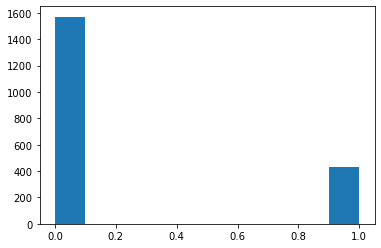

In [73]:
plt.hist(book["RefBks"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b3039c0760>,
 'caps': [<matplotlib.lines.Line2D at 0x1b3039c0e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b3039c03d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b3031305e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b303130970>],
 'means': []}

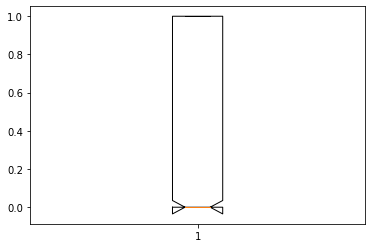

In [72]:
plt.boxplot(book["ChildBks"],'bo')

{'whiskers': [<matplotlib.lines.Line2D at 0x1b3032f18b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b3032f1fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b3032f1520>],
 'medians': [<matplotlib.lines.Line2D at 0x1b303300730>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b303300ac0>],
 'means': []}

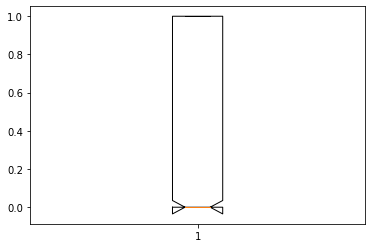

In [46]:
plt.boxplot(book["GeogBks"],'bo')

{'whiskers': [<matplotlib.lines.Line2D at 0x1b303361340>,
 'caps': [<matplotlib.lines.Line2D at 0x1b303361a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b303351f70>],
 'medians': [<matplotlib.lines.Line2D at 0x1b30336b1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b30336b550>],
 'means': []}

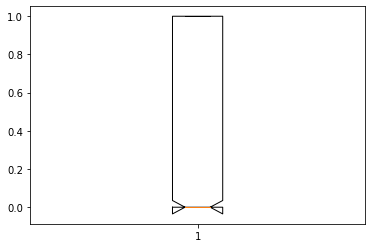

In [47]:
plt.boxplot(book["ChildBks"],'bo')